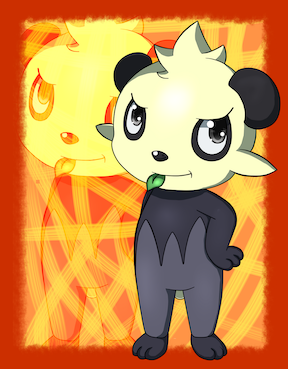

In [1]:
from IPython import display
display.Image("images/panda-pokemon.png")

<p style="font-size:9px;">Week 13 notebook, Apr 4, 2022, gb</p><hr />
<h1 style="color:cornflowerblue;">Week 13: Pandas</h1>
    <p>Contents: a quick review of some fundamentals.</p>
<ol>
<li>Reading in data</li>
<li>Getting familiar with the data (groupby, ngroups, first, get_group)</li>
<li>agg() and basic stats</li>
<li>using functions and lambda expressions</li>
<li>extracting single column and condition</li>
<li>merging and joining datasets</li>
<li>conditions and .get()</li>
<li>histogram hist()</li>
<li>Joins</li>
<li>Crosstabs and Pivot tables</li>
<li>Structured &amp; Semi- and Unstructured Files</li>
<li>Time Series</li>
<li>Final exam prep</li>
</ol>

<h2>A point of view of learning about our data ... </h2>
<blockquote>
    <p>At this point in our course, you've mastered lots of python and libraries - we're at the point where your domain expertise comes into play and we turn more to documention and other guides because of the number of code commands and your own needs outpace what can be covered usefully.  Let's review, tho, some basic steps and wrap up the rest of our content.</p>
</blockquote>
<p>Loading the data - here, of course, we might read a .csv or other file type, or we might poll an online resource (rdbms or webscraping).  Let's start with a very small dataset from the Census.
</p>
<p>Get to know the data ... column names, field data types, missing values, NaNs, rename field names, etc.  There are <u>far too many</u> commands to master in a week - review Week 11's notebooks and plan your explorations with the pandas documentation.</p>
</p>
<p>Once the data source seems prepped, your research area/questions come into play.  Extract subsets of the data to explore ...  In code, we might ask 
<ul>
<li>extract a subset</li>
<li>how many groups for that subset?</li>
<li>who are the members of those subsets?</li>
<li>what's the numbers of members .size()</li>
    <li>check the subsets - head() last()</li>
    <li>extract other subsets</li>
</ul>

<hr />
<p style="color:cornflowerblue;">Reading in some data</p>
<p>You can import comma-separated values in a txt file, too, replacing \t with a comma; or use the sep="" command, e.g., <code>df = pd.read_csv("mysource.txt", sep=" ")</code></p>
<p>Remember, there's also <code>read_excel()</code>, <code>json.loads()</code> [returns a dictionary] and <code>json.load() [to pass to var]</code>, <code>read_csv()</code>, each with a number of parameters for handling NaNs, missing values, headers.</p>

In [2]:
import pandas as pd

df = pd.read_csv('ri_data.txt')
df.head()

Town  Household  Family  PerCap      County
0     Barrington     125431  147849   65777     Newport
1        Bristol      72610   95422   36960     Newport
2   Burrillville      84680   99019   35127  Providence
3  Central Falls      32982   34623   15519  Providence
4    Charlestown      78209   92246   44597       South

<hr /><p style="color:cornflowerblue;">Becoming familiar with the file</p>
<p>Given this small set, I want to group by county and explore...  How many sets will I find?  Who are the members thereof? </p>

In [3]:
df_county = df.groupby('County')
print("Number of groups: ", df_county.ngroups)

Number of groups:  4


In [4]:
print("Groups: ", df_county.groups)
print("-"*40)
# tells us the # of towns in each county
print("Towns per County: ", df_county.size())

Groups:  {'Kent': Int64Index([5, 6, 8, 10, 34, 35, 36], dtype='int64'), 'Newport': Int64Index([0, 1, 14, 17, 18, 21, 26, 32, 33], dtype='int64'), 'Providence': Int64Index([2, 3, 7, 9, 11, 12, 15, 16, 23, 24, 25, 27, 29, 30, 38], dtype='int64'), 'South': Int64Index([4, 13, 19, 20, 22, 28, 31, 37], dtype='int64')}
----------------------------------------
Towns per County:  County
Kent           7
Newport        9
Providence    15
South          8
dtype: int64


In [5]:
df_county.first()

Town  Household  Family  PerCap
County                                             
Kent            Coventry      73392   91004   37216
Newport       Barrington     125431  147849   65777
Providence  Burrillville      84680   99019   35127
South        Charlestown      78209   92246   44597

In [6]:
df_newport = df_county.get_group('Newport')
df_newport

Town  Household  Family  PerCap
0       Barrington     125431  147849   65777
1          Bristol      72610   95422   36960
14       Jamestown     111110  125375   66010
17  Little Compton      89353  100938   59999
18      Middletown      73609   87442   41675
21         Newport      67102   95078   44386
26      Portsmouth     100453  122738   55858
32        Tiverton      75295   89250   40365
33          Warren      59926   94093   37303

<hr /><p style="color:cornflowerblue;">Check out some basic stats...</p>

In [7]:
# great.  We have our subset ... let's get some basic
# stats ...
df_newport.groupby('Town').Household.agg(['min','max','mean'])

min     max    mean
Town                                  
Barrington      125431  125431  125431
Bristol          72610   72610   72610
Jamestown       111110  111110  111110
Little Compton   89353   89353   89353
Middletown       73609   73609   73609
Newport          67102   67102   67102
Portsmouth      100453  100453  100453
Tiverton         75295   75295   75295
Warren           59926   59926   59926

<p>In the above case, it turns out own data already is mean/max/min... so let's just see the min/max</p>

In [8]:
df.groupby('Town').Household.agg(
    town_max=('max'),town_min=('min'))

town_max  town_min
Town                                
Barrington          125431    125431
Bristol              72610     72610
Burrillville         84680     84680
Central Falls        32982     32982
Charlestown          78209     78209
Coventry             73392     73392
Cranston             72017     72017
Cumberland           91726     91726
East Greenwich      114147    114147
East Providence      59142     59142
Exeter               84919     84919
Foster               89844     89844
Glocester            89391     89391
Hopkinton            90134     90134
Jamestown           111110    111110
Johnston             65125     65125
Lincoln              81045     81045
Little Compton       89353     89353
Middletown           73609     73609
Narragansett         86920     86920
New Shoreham         59423     59423
Newport              67102     67102
North Kingstown      91796     91796
North Providence     57135     57135
North Smithfield     78617     78617
Pawtucket            50476     50476
Portsmouth          100453    100453
Providence           45610     45610
Richmond             95391     95391
Scituate             96179     96179
Smithfield           85337     85337
South Kingstown      89917     89917
Tiverton             75295     75295
Warren               59926     59926
Warwick              73757     73757
West Greenwich      119688    119688
West Warwick         55927     55927
Westerly             70784     70784
Woonsocket           42595     42595

<hr /><p style="color:cornflowerblue;">Functions or Lambda expressions for conditions</p>

In [9]:
# we're looking for towns with household income
# greater than 80000
def town_income(x):
    i = x.mean()
    return True if i > 80000 else False

df_x = df.groupby('Town').Household.agg(['mean',town_income])
# this can be written with a lambda ... 
# replace 'town_income' with lambda x : 
# True if x.mean() > 80000 else False


In [10]:
df_wealthy = df.groupby('Town').Household.agg(
    ['mean',lambda x : True if x.mean() > 80000 else False])
df_wealthy

mean  <lambda_0>
Town                                
Barrington        125431        True
Bristol            72610       False
Burrillville       84680        True
Central Falls      32982       False
Charlestown        78209       False
Coventry           73392       False
Cranston           72017       False
Cumberland         91726        True
East Greenwich    114147        True
East Providence    59142       False
Exeter             84919        True
Foster             89844        True
Glocester          89391        True
Hopkinton          90134        True
Jamestown         111110        True
Johnston           65125       False
Lincoln            81045        True
Little Compton     89353        True
Middletown         73609       False
Narragansett       86920        True
New Shoreham       59423       False
Newport            67102       False
North Kingstown    91796        True
North Providence   57135       False
North Smithfield   78617       False
Pawtucket          50476       False
Portsmouth        100453        True
Providence         45610       False
Richmond           95391        True
Scituate           96179        True
Smithfield         85337        True
South Kingstown    89917        True
Tiverton           75295       False
Warren             59926       False
Warwick            73757       False
West Greenwich    119688        True
West Warwick       55927       False
Westerly           70784       False
Woonsocket         42595       False

In [11]:
df_compare = df.loc[:, ['Town','Household', 'PerCap']]
df_compare.groupby(['Town','PerCap']).mean()

Household
Town             PerCap           
Barrington       65777      125431
Bristol          36960       72610
Burrillville     35127       84680
Central Falls    15519       32982
Charlestown      44597       78209
Coventry         37216       73392
Cranston         33974       72017
Cumberland       43603       91726
East Greenwich   62337      114147
East Providence  33091       59142
Exeter           40802       84919
Foster           36839       89844
Glocester        38174       89391
Hopkinton        40169       90134
Jamestown        66010      111110
Johnston         35307       65125
Lincoln          43573       81045
Little Compton   59999       89353
Middletown       41675       73609
Narragansett     49277       86920
New Shoreham     36812       59423
Newport          44386       67102
North Kingstown  47120       91796
North Providence 34495       57135
North Smithfield 39523       78617
Pawtucket        27799       50476
Portsmouth       55858      100453
Providence       26560       45610
Richmond         40232       95391
Scituate         47911       96179
Smithfield       38514       85337
South Kingstown  38927       89917
Tiverton         40365       75295
Warren           37303       59926
Warwick          39653       73757
West Greenwich   46008      119688
West Warwick     32176       55927
Westerly         40999       70784
Woonsocket       24957       42595

In [12]:
df_compare.loc[df_compare['Town'] == 'Newport']

Town  Household  PerCap
21  Newport      67102   44386

<hr />
<h2 style="color:cornflowerblue;">Merging and Joining Datasets</h2>
<p>Scenario: you have 2+ datasets to merge and to explore ... Here we have our RI data and added: the original income and now one about education rates.</p>

In [13]:
df_income = pd.read_csv('ri_data.txt')
df_educ = pd.read_csv('ri_edu.txt')

# merge them and see what happens... 

In [14]:
#pd.merge(df_income, df_educ)
# without a common column name, the merge will fail ... 
# in which case you a join option (below)
df_merged = pd.merge(df_income, df_educ, on='Town')
df_merged

Town  Household  Family  PerCap      County  Over25  \
0         Barrington     125431  147849   65777     Newport   11141   
1            Bristol      72610   95422   36960     Newport   14672   
2       Burrillville      84680   99019   35127  Providence   11808   
3      Central Falls      32982   34623   15519  Providence   11636   
4        Charlestown      78209   92246   44597       South    5852   
5           Coventry      73392   91004   37216        Kent   25176   
6           Cranston      72017   88700   33974        Kent   57873   
7         Cumberland      91726  109169   43603  Providence   25176   
8     East Greenwich     114147  153475   62337        Kent    9030   
9    East Providence      59142   78400   33091  Providence   35274   
10            Exeter      84919  110929   40802        Kent    4552   
11            Foster      89844  104679   36839  Providence    3461   
12         Glocester      89391  101250   38174  Providence    7386   
13         Hopkinton      90134   99545   40169       South    5836   
14         Jamestown     111110  125375   66010     Newport    4189   
15          Johnston      65125   91760   35307  Providence   22222   
16           Lincoln      81045  107146   43573  Providence   15197   
17    Little Compton      89353  100938   59999     Newport    2844   
18        Middletown      73609   87442   41675     Newport   11971   
19      Narragansett      86920  131548   49277       South   10337   
20      New Shoreham      59423   66071   36812       South     718   
21           Newport      67102   95078   44386     Newport   17143   
22   North Kingstown      91796  113950   47120       South   18735   
23  North Providence      57135   78703   34495  Providence   24209   
24  North Smithfield      78617  100488   39523  Providence    9262   
25         Pawtucket      50476   60984   27799  Providence   50877   
26        Portsmouth     100453  122738   55858     Newport   12564   
27        Providence      45610   53659   26560  Providence  108898   
28          Richmond      95391  108148   40232       South    5424   
29          Scituate      96179  112024   47911  Providence    7875   
30        Smithfield      85337  103711   38514  Providence   14588   
31   South Kingstown      89917  112978   38927       South   18169   
32          Tiverton      75295   89250   40365     Newport   12154   
33            Warren      59926   94093   37303     Newport    8323   
34           Warwick      73757   92368   39653        Kent   61174   
35    West Greenwich     119688  120331   46008        Kent    4632   
36      West Warwick      55927   74649   32176        Kent   21018   
37          Westerly      70784   97107   40999       South   16861   
38        Woonsocket      42595   54129   24957  Providence   28943   

    HSGradCollege    BA  
0            97.1  69.1  
1            87.5  41.1  
2            90.1  29.0  
3            64.9   8.1  
4            94.5  38.0  
5            91.2  27.5  
6            89.9  33.2  
7            90.1  38.9  
8            96.4  62.6  
9            85.8  28.6  
10           91.7  48.6  
11           95.8  34.7  
12           94.7  32.2  
13           95.7  30.6  
14           97.2  64.6  
15           89.5  23.8  
16           91.5  41.1  
17           97.4  52.9  
18           93.5  45.6  
19           97.5  56.7  
20           97.4  36.1  
21           94.1  52.8  
22           95.4  51.4  
23           91.2  30.0  
24           91.3  31.3  
25           81.3  21.8  
26           94.9  52.3  
27           81.6  30.1  
28           96.3  35.8  
29           95.9  36.6  
30           93.0  36.3  
31           95.6  55.7  
32           91.5  32.6  
33           88.7  36.2  
34           92.5  33.8  
35           95.6  46.1  
36           89.8  23.3  
37           92.4  34.8  
38           81.8  17.8

<hr /><p style="color:cornflowerblue;">As before use conditions, pyaing attention to the order of operations ( ).</p>

In [15]:
df_merged[(df_merged['HSGradCollege'] > 90) & (df_merged['BA'] > 50)]

Town  Household  Family  PerCap   County  Over25  \
0        Barrington     125431  147849   65777  Newport   11141   
8    East Greenwich     114147  153475   62337     Kent    9030   
14        Jamestown     111110  125375   66010  Newport    4189   
17   Little Compton      89353  100938   59999  Newport    2844   
19     Narragansett      86920  131548   49277    South   10337   
21          Newport      67102   95078   44386  Newport   17143   
22  North Kingstown      91796  113950   47120    South   18735   
26       Portsmouth     100453  122738   55858  Newport   12564   
31  South Kingstown      89917  112978   38927    South   18169   

    HSGradCollege    BA  
0            97.1  69.1  
8            96.4  62.6  
14           97.2  64.6  
17           97.4  52.9  
19           97.5  56.7  
21           94.1  52.8  
22           95.4  51.4  
26           94.9  52.3  
31           95.6  55.7

In [16]:
df_merged.get(['Town','BA'])

Town    BA
0         Barrington  69.1
1            Bristol  41.1
2       Burrillville  29.0
3      Central Falls   8.1
4        Charlestown  38.0
5           Coventry  27.5
6           Cranston  33.2
7         Cumberland  38.9
8     East Greenwich  62.6
9    East Providence  28.6
10            Exeter  48.6
11            Foster  34.7
12         Glocester  32.2
13         Hopkinton  30.6
14         Jamestown  64.6
15          Johnston  23.8
16           Lincoln  41.1
17    Little Compton  52.9
18        Middletown  45.6
19      Narragansett  56.7
20      New Shoreham  36.1
21           Newport  52.8
22   North Kingstown  51.4
23  North Providence  30.0
24  North Smithfield  31.3
25         Pawtucket  21.8
26        Portsmouth  52.3
27        Providence  30.1
28          Richmond  35.8
29          Scituate  36.6
30        Smithfield  36.3
31   South Kingstown  55.7
32          Tiverton  32.6
33            Warren  36.2
34           Warwick  33.8
35    West Greenwich  46.1
36      West Warwick  23.3
37          Westerly  34.8
38        Woonsocket  17.8

In [17]:
df_merged.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245136E3FC8>,
      dtype=object)

<hr />
<h2 style="color:cornflowerblue;">Merging with different column names</h2>
<p>Note that if there are different column names in the 
files you'll have to tell pandas which column in each
"left" and "right" to join on ...</p>
<p>
    <pre>pd.merge(df_income, df_educ, 
        left_on = 'Region',
        right_on = 'Town
        )</pre>
</p>
    <h2>NaN</h2><p>See https://pandas.pydata.org/docs/user_guide/missing_data.html</p>

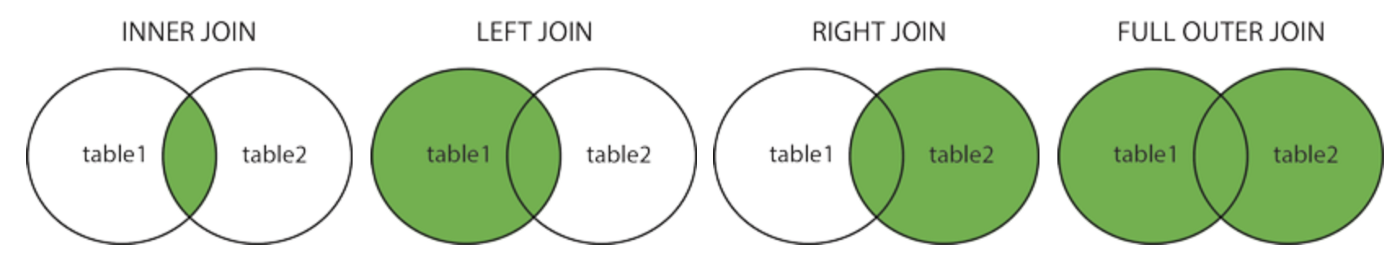

In [18]:
display.Image("images/joins.png")

<hr />
<p>More about joins...  as you probably know 
    <ul>
        <li>inner: the default join type in Pandas merge() function and it produces records that have matching values in both DataFrames</li>
<li>left: produces all records from the left DataFrame and the matched records from the right DataFrame</li>
<li>right: produces all records from the right DataFrame and the matched records from the left DataFrame</li>
        <li>outer: produces all records when there is a match in either left or right DataFrame</li>
        </ul>
<p><a href="https://towardsdatascience.com/all-the-pandas-merge-you-should-know-for-combining-datasets-526b9ecaf184" target="new">https://towardsdatascience.com/all-the-pandas-merge-you-should-know-for-combining-datasets-526b9ecaf184</a></p>

<hr />
<h2 style="color:cornflowerblue;">Crosstabs</h2>
<p>The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear. </p>
<p>Using a well-known dataset from UCI Machine Learning Repository [https://archive-beta.ics.uci.edu/]</p>

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_excel("sales-funnel.xlsx")
df.head()

Account                          Name            Rep       Manager  \
0   714466               Trantow-Barrows   Craig Booker  Debra Henley   
1   714466               Trantow-Barrows   Craig Booker  Debra Henley   
2   714466               Trantow-Barrows   Craig Booker  Debra Henley   
3   737550  Fritsch, Russel and Anderson   Craig Booker  Debra Henley   
4   146832                  Kiehn-Spinka  Daniel Hilton  Debra Henley   

       Product  Quantity  Price     Status  
0          CPU         1  30000  presented  
1     Software         1  10000  presented  
2  Maintenance         2   5000    pending  
3          CPU         1  35000   declined  
4          CPU         2  65000        won

In [20]:
pd.pivot_table(df,index=["Name","Rep","Manager"])

Account   Price  \
Name                         Rep           Manager                          
Barton LLC                   John Smith    Debra Henley    740150   35000   
Fritsch, Russel and Anderson Craig Booker  Debra Henley    737550   35000   
Herman LLC                   Cedric Moss   Fred Anderson   141962   65000   
Jerde-Hilpert                John Smith    Debra Henley    412290    5000   
Kassulke, Ondricka and Metz  Wendy Yule    Fred Anderson   307599    7000   
Keeling LLC                  Wendy Yule    Fred Anderson   688981  100000   
Kiehn-Spinka                 Daniel Hilton Debra Henley    146832   65000   
Koepp Ltd                    Wendy Yule    Fred Anderson   729833   35000   
Kulas Inc                    Daniel Hilton Debra Henley    218895   25000   
Purdy-Kunde                  Cedric Moss   Fred Anderson   163416   30000   
Stokes LLC                   Cedric Moss   Fred Anderson   239344    7500   
Trantow-Barrows              Craig Booker  Debra Henley    714466   15000   

                                                          Quantity  
Name                         Rep           Manager                  
Barton LLC                   John Smith    Debra Henley   1.000000  
Fritsch, Russel and Anderson Craig Booker  Debra Henley   1.000000  
Herman LLC                   Cedric Moss   Fred Anderson  2.000000  
Jerde-Hilpert                John Smith    Debra Henley   2.000000  
Kassulke, Ondricka and Metz  Wendy Yule    Fred Anderson  3.000000  
Keeling LLC                  Wendy Yule    Fred Anderson  5.000000  
Kiehn-Spinka                 Daniel Hilton Debra Henley   2.000000  
Koepp Ltd                    Wendy Yule    Fred Anderson  2.000000  
Kulas Inc                    Daniel Hilton Debra Henley   1.500000  
Purdy-Kunde                  Cedric Moss   Fred Anderson  1.000000  
Stokes LLC                   Cedric Moss   Fred Anderson  1.000000  
Trantow-Barrows              Craig Booker  Debra Henley   1.333333

In [21]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [22]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [23]:
# DataFrames like SQL: query
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [24]:
pd.crosstab(df.Rep, df.Price)

Price          5000    7000    10000   30000   35000   40000   65000   100000
Rep                                                                          
Cedric Moss         1       0       1       1       0       0       1       0
Craig Booker        1       0       1       1       1       0       0       0
Daniel Hilton       0       0       1       0       0       1       1       0
John Smith          1       0       0       0       1       0       0       0
Wendy Yule          1       1       0       0       0       0       1       1

In [25]:
pd.crosstab(df.Rep, df.Price, margins=True, margins_name="Total")

Price          5000  7000  10000  30000  35000  40000  65000  100000  Total
Rep                                                                        
Cedric Moss       1     0      1      1      0      0      1       0      4
Craig Booker      1     0      1      1      1      0      0       0      4
Daniel Hilton     0     0      1      0      0      1      1       0      3
John Smith        1     0      0      0      1      0      0       0      2
Wendy Yule        1     1      0      0      0      0      1       1      4
Total             4     1      3      2      2      1      3       1     17

(9.0, 0.0)

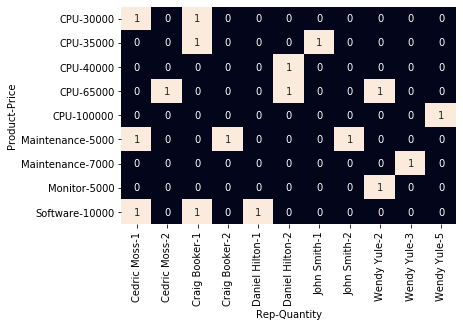

In [33]:
matrix = np.triu(pd.crosstab([df.Product, df.Price], [df.Rep, df.Quantity]))

ax = sns.heatmap(pd.crosstab([df.Product, df.Price], [df.Rep, df.Quantity]),
            annot=True, cbar=False)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<hr />
<h2 style="color:cornflowerblue;">Structured &amp; Unstructured Files</h2>
<p>A brief note (for Wk 14) about files.  A common division is <u>structured</u> data and <u>unstructured</u>.  Some folk include <u>semi-structured</u>.
</p>
<ol><li>
    <b>Structured</b>: usually something from an application, such as SQL, where the application itself facilitates creating data tables, conforming to a standard, that's more efficient for storage and retrieval.</li>
    <li><b>Unstructured</b>: is just a text file - the stream of letters or characters in a flat file, usually casually called .txt files.  Here we might include non-relational (NoSQL) databases.</li>
    <li><b>Semi-structured</b>: are text files where the structure of the file and the data are all just text.  Most common examples are .json and sgml-derivatives (.html, .svg, .xml, etc.): the metadata is used to extract meaningful subsets.</li>
</ol>
<p>Semi-structured files typically conform to some industry-specific practice and descriptive standards: for instance, XBRL (Extensible Business REporting Language), VRA4 (Visual Resources Descriptors, 4th ed.), MathML (Math Modeling Language), phyloXML (phylogenetic networks in genomics) and endless others.</p>
<hr />

<hr />
<h2 style="color:cornflowerblue;">Time Series</h2>
<p>Time series analyses typically reveal trends, irregularities, time-dependent cycles and seasonality.  Thre are also common models used here: ARIMA (Auto-Regressive Integrated Moving Average) [to predict errors]; Moving Average [helps identify random noise and plotting to smooth out noise], and others.</p>
<p>Naturally you'll have to work with, format, and manipulate date/time data.</p>
<p>Check out <a href="https://www.machinelearningplus.com/time-series/time-series-analysis-python/" target="new"> for a nice demo</a>.</p>

In [31]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser = parser)
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


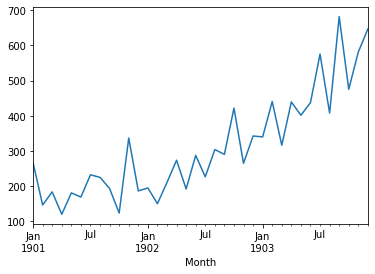

In [28]:
series.plot()
pyplot.show()

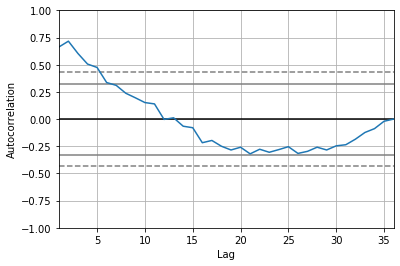

In [29]:
autocorrelation_plot(series)
pyplot.show()

<hr />
<h2 style="color:cornflowerblue;">Final exam prep</h2>

<h1>Next week: Presentations</h1>

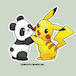

In [30]:
display.Image("images/pika-panda.jpeg")